In [1]:
# Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!pip install geopandas
import geopandas as gpd # Used to process Geospatial Data
import seaborn as sns # Used to visualize the Data

!pip install factor_analyzer
# Import machine learning libraries and modules
from factor_analyzer import FactorAnalyzer # Used to factor analysis
from sklearn.decomposition import PCA # Used to Data reduction and principal component analysis #Used to Regression Analysis
from sklearn.feature_selection import mutual_info_regression

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 51.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 71.0 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 65.2 MB/s eta 0:00:00:00:01
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 KB 1.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 58.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 KB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 KB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [2]:
# Import the Data
pay_gap = pd.read_csv('pay_gap_Europe.csv')
# Check the features of the Data
pay_gap.head()

,Country,Year,GDP,Urban_population,Industry,Business,Mining,Manufacturing,Electricity_supply,Water_supply,...,Information,Financial,Real estate,Professional_scientific,Administrative,Public_administration,Education,Human_health,Arts,Other
0,Austria,2010,35390,57.40,24.0,25.2,18.3,24.4,23.6,12.2,...,21.2,30.3,27.0,34.0,22.5,NaN,27.8,12.0,34.0,32.0
1,Austria,2011,36300,57.12,23.5,24.7,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Austria,2012,36390,57.15,22.9,24.3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Austria,2013,36180,57.34,22.3,23.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Austria,2014,36130,57.53,22.2,23.8,15.9,23.0,19.8,10.0,...,22.9,30.4,27.8,31.5,19.5,NaN,24.3,12.8,26.6,28.8


In [3]:
print(pay_gap.columns)
print(pay_gap.shape)

Index(['Country', 'Year', 'GDP', 'Urban_population', 'Industry', 'Business',
       'Mining', 'Manufacturing', 'Electricity_supply', 'Water_supply',
       'Construction', 'Retail trade', 'Transportation', 'Accommodation',
       'Information', 'Financial', 'Real estate ', 'Professional_scientific',
       'Administrative', 'Public_administration', 'Education', 'Human_health',
       'Arts', 'Other'],
      dtype='object')
(324, 24)


This dataset have 24 columns

In [4]:
# Split the Data in 2021
pay_gap_2021 = pay_gap[pay_gap['Year']==2021]
pay_gap_2021.head()
# Check the data type
pay_gap.dtypes

Country                     object
Year                         int64
GDP                          int64
Urban_population           float64
Industry                   float64
Business                   float64
Mining                     float64
Manufacturing              float64
Electricity_supply         float64
Water_supply               float64
Construction               float64
Retail trade               float64
Transportation             float64
Accommodation              float64
Information                float64
Financial                  float64
Real estate                float64
Professional_scientific    float64
Administrative             float64
Public_administration      float64
Education                  float64
Human_health               float64
Arts                       float64
Other                      float64
dtype: object

## Data Quality Verification

In [5]:
# Field Inspection
print(pay_gap.describe(include='all'))
# Handling Missing Values
print("\nMissing Values Count:")
print(pay_gap.isnull().sum())
# Outliers Detection (using IQR method for simplicity)
Q1 = pay_gap.quantile(0.25)
Q3 = pay_gap.quantile(0.75)
IQR = Q3 - Q1
outliers = (pay_gap < (Q1 - 1.5 * IQR)) | (pay_gap > (Q3 + 1.5 * IQR))
print("\nOutliers Count:")
print(outliers.sum())
# Checking for Duplicates
print("\nDuplicate Rows Count:", pay_gap.duplicated().sum())


# Calculate the number of records for each year
yearly_record_count = pay_gap.groupby('Year').apply(lambda group: group.notnull().all(axis=1).sum())

# Get the range of years in the dataset
year_range = range(pay_gap['Year'].min(), pay_gap['Year'].max() + 1)

# Calculate the data missing percentage for each year
yearly_missing_percentage = []

for year in year_range:
    total_records = yearly_record_count.get(year, 0)
    missing_records = len(pay_gap[(pay_gap['Year'] == year) & (pay_gap.isnull().any(axis=1))])
    missing_percentage = (missing_records / total_records) * 100 if total_records > 0 else 0
    yearly_missing_percentage.append((year, missing_percentage))

# Print the data missing percentage for each year
for year, missing_percentage in yearly_missing_percentage:
    print(f"For Year {year}: Complete Records: Our Python script identified that {100 - missing_percentage:.2f}% of the records are complete.")

        Country         Year           GDP  Urban_population    Industry  \
count       324   324.000000    324.000000        324.000000  321.000000   
unique       27          NaN           NaN               NaN         NaN   
top     Austria          NaN           NaN               NaN         NaN   
freq         12          NaN           NaN               NaN         NaN   
mean        NaN  2015.500000  28012.438272         73.457747   13.861994   
std         NaN     3.457392  19047.046525         12.746678    5.849508   
min         NaN  2010.000000   5080.000000         52.660000   -0.200000   
25%         NaN  2012.750000  13045.000000         65.622500    9.600000   
50%         NaN  2015.500000  22330.000000         73.275000   14.600000   
75%         NaN  2018.250000  36382.500000         84.895000   17.700000   
max         NaN  2021.000000  84750.000000         98.120000   29.900000   

          Business      Mining  Manufacturing  Electricity_supply  \
count   320.000000

/tmp/ipykernel_2090/3634229359.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (pay_gap < (Q1 - 1.5 * IQR)) | (pay_gap > (Q3 + 1.5 * IQR))


In [6]:
def quality_check_table(df, output_file):
    data = []
    for col in df.columns:
        valid = df[col].notnull().sum()
        null = df[col].isnull().sum()
        empty_string = (df[col] == "").sum()
        white_space = df[col].astype(str).str.isspace().sum()
        blank_value = empty_string + white_space
        outliers_count = outliers[col].sum()  # From previous calculation
        extremes_count = outliers_count  # This is a simplification; actual method may differ
        data.append([col, f"{valid / len(df) * 100:.2f}%", valid, null, empty_string, white_space, blank_value, outliers_count, extremes_count])

    columns = ["Field", "%Complete", "Valid Records", "Null Values", "Empty String", "White Space", "Blank Value", "Outliers", "Extremes"]
    quality_df = pd.DataFrame(data, columns=columns)

    # export to csv
    quality_df.to_csv(output_file, index=False)

output_file = "quality_check_result.csv"
quality_check_table(pay_gap, output_file)

## 3.1 Data Selection

In [7]:
# Split the Data in 2021
pay_gap_2021 = pay_gap[pay_gap['Year']==2021]
pay_gap_2021.head()
# Null values imputation
pay_gap_2021.isna().sum()

Country                    0
Year                       0
GDP                        0
Urban_population           0
Industry                   0
Business                   0
Mining                     1
Manufacturing              0
Electricity_supply         2
Water_supply               0
Construction               0
Retail trade               0
Transportation             0
Accommodation              0
Information                0
Financial                  0
Real estate                0
Professional_scientific    0
Administrative             0
Public_administration      4
Education                  0
Human_health               0
Arts                       0
Other                      0
dtype: int64

In 2021 pay gap data, there are 1 null value in Mining, 2 in Electricity_supply and 4 null values in Public_administration. We use a simple imputation method.

In [8]:
# Use a simple imputation method
pay_gap_2021.fillna(pay_gap_2021.mean(),inplace=True)

/tmp/ipykernel_2090/2569560060.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pay_gap_2021.fillna(pay_gap_2021.mean(),inplace=True)
/tmp/ipykernel_2090/2569560060.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pay_gap_2021.fillna(pay_gap_2021.mean(),inplace=True)


There are 22 number columns in pay_gap_2021
5


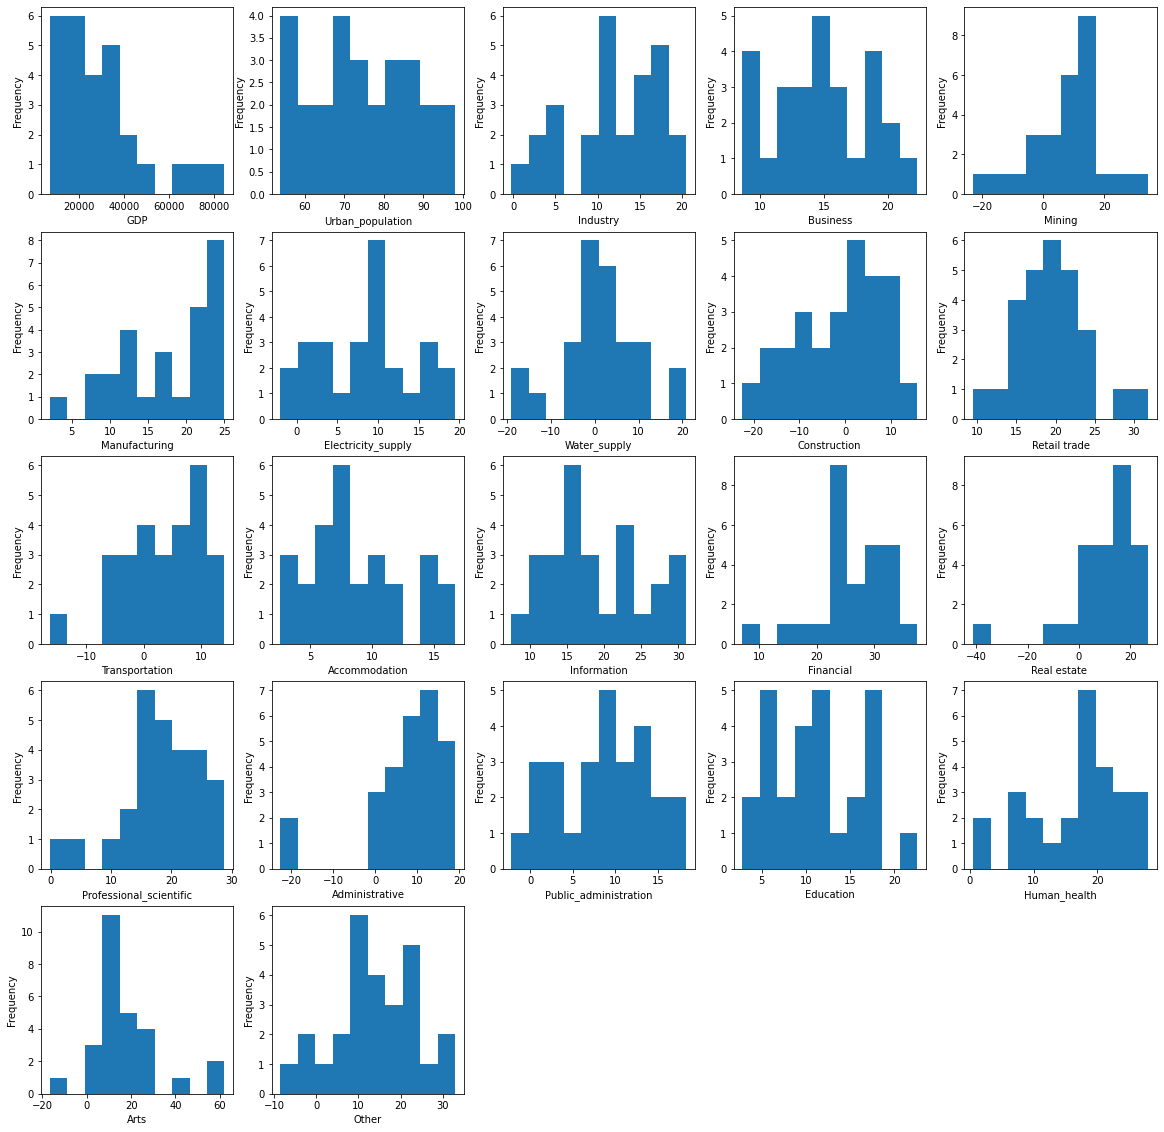

In [9]:
# Remove the year column
if 'Year' in pay_gap_2021.columns:
    pay_gap_2021 = pay_gap_2021.drop(['Year'], axis=1)
# Extract the number colunms
num_cols=[col for col in pay_gap_2021.columns if pay_gap_2021[col].dtype in ['int64','float64']]
num_cols_len=len(num_cols)
num_cols_per_row=5
print("There are",num_cols_len,"number columns in pay_gap_2021")
num_rows=int(num_cols_len/num_cols_per_row)+(num_cols_len % num_cols_per_row >0)
print(num_rows)
# Plot the frequencies of every number column
fig, axs=plt.subplots(num_rows,num_cols_per_row,figsize=(20,4*num_rows),gridspec_kw={'width_ratios':[1,1,1,1,1]})
for idx, col in enumerate(num_cols):
    row_idx=int(idx/num_cols_per_row)
    col_idx=idx % num_cols_per_row
    if idx>=num_cols_len:
        axs[row_idx,col_idx].axis('off')
    else:
        axs[row_idx,col_idx].hist(pay_gap_2021[col])
        axs[row_idx,col_idx].set_xlabel(col)
        axs[row_idx,col_idx].set_ylabel('Frequency')
# Remove any empty subplots
if num_cols_len % num_cols_per_row>0:
    for i in range(num_cols_len % num_cols_per_row, num_cols_per_row):
        fig.delaxes(axs[num_rows-1,i])
plt.tight_layout
plt.show()

We find extreme values in almost every number column, but we can group the outlier countries into different clusters in order to better understand them.

In [10]:
# Calculate coefficient of variation(CV)
cv=(pay_gap_2021[num_cols].std()/pay_gap_2021[num_cols].mean())*100
# Create DataFrame of the cv values
cv_df=pd.DataFrame({'CV':cv})
print(cv_df)

                                 CV
GDP                       64.905374
Urban_population          17.522873
Industry                  45.171102
Business                  25.705168
Mining                   151.881850
Manufacturing             36.594891
Electricity_supply        67.573354
Water_supply             612.421326
Construction            -974.813647
Retail trade              24.572919
Transportation           205.739054
Accommodation             45.850270
Information               33.435398
Financial                 26.056547
Real estate              125.230861
Professional_scientific   35.794942
Administrative           134.519214
Public_administration     64.437141
Education                 48.102910
Human_health              43.407248
Arts                      95.970242
Other                     72.785582


The data needs to be normalized, as there is a high degree of heterogeneity among features(CV>35%).

Principal Component Analysis

In [11]:
X= pay_gap_2021[num_cols]
# Normalize the features
X_norm=(X-X.mean(axis=0))/X.std(axis=0)
# Principal component analysis on number columns
pca=PCA()
# Fit and transform X_norm to PCA dataframe
X_pca=pca.fit_transform(X_norm)
# Convert to dataframe
names=[f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca_df=pd.DataFrame(X_pca,columns=names)
print(X_pca_df.head())
print("Shape of PCA DataFrame:",X_pca_df.shape)

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.584665 -1.692110 -0.384409  0.586485  1.061391 -1.182269  2.132974   
1  5.209759 -1.820833 -0.744330 -0.088776  0.272067  1.029793  0.260564   
2  0.038249  2.302154 -1.572696  0.190695 -0.818158  3.250748 -0.084059   
3 -0.011531  2.597254  1.461862 -1.286784  0.652203 -0.609136  1.307960   
4 -2.511675  2.438870  5.380843  0.723575  0.070936  1.828545  0.520392   

        PC8       PC9      PC10  ...      PC13      PC14      PC15      PC16  \
0  0.143808 -0.583056 -0.455484  ... -0.542875 -0.842590 -0.117323  0.140887   
1  2.236982  0.006903  0.651727  ...  1.008374 -0.330080  0.084035 -0.086998   
2 -0.988268  0.874566  0.034599  ... -0.483748 -0.893899 -0.333260 -0.200202   
3  0.689167  0.171394 -0.630258  ...  0.591439  0.038481 -0.273751  0.494912   
4  0.590620 -0.526295  0.718273  ...  0.148433  0.116746  0.128047  0.142787   

       PC17      PC18      PC19      PC20      PC21      PC22  
0  0

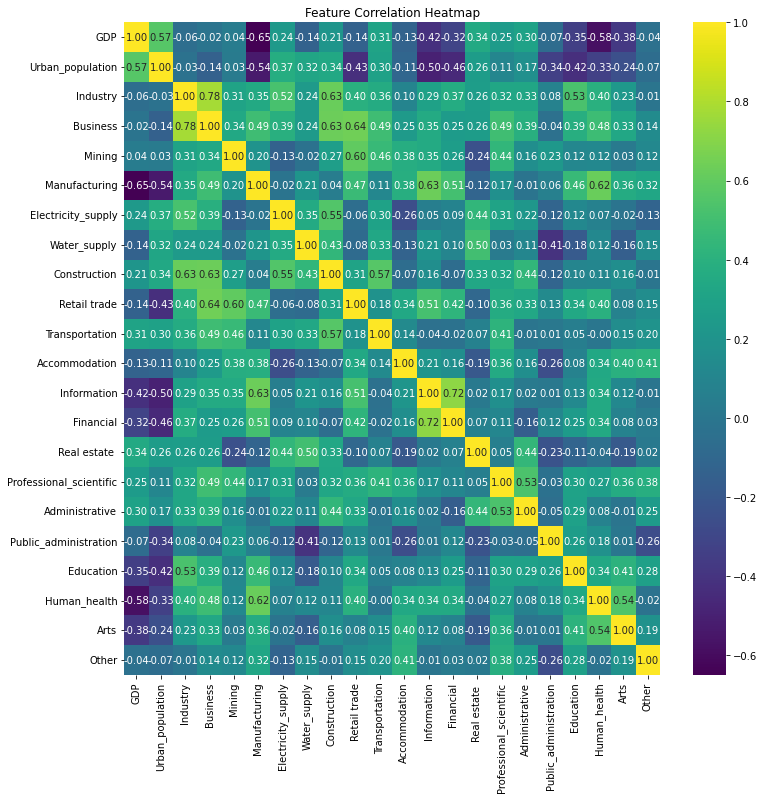

In [12]:
# Create covariance matrix
corr_matrix=np.corrcoef(X_norm.T)
# Create heatmap
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix,cmap='viridis',annot=True,fmt='.2f',xticklabels=pay_gap_2021[num_cols].columns,yticklabels=pay_gap_2021[num_cols].columns)
# Set plot title
plt.title('Feature Correlation Heatmap')
# Show the plot
plt.show()

There are some high correlations(0.72,0.78) so PCA will most likely be effective in dimensionality reduction.

In [13]:
# Calculate eigenvectors and eigenvalues
eigenvalues,eigenvectors=np.linalg.eig(corr_matrix)
print(eigenvalues)
print(eigenvectors)
# Sort the eigenvalues and eigenvectors in descending order
idx=eigenvalues.argsort()[::-1]
eigenvalues=eigenvalues[idx]
# Convert to dataframes
eigenvalues_df=pd.DataFrame({'Eigenvalue':eigenvalues},index=pay_gap_2021[num_cols].columns)
eigenvalues_df['Proportion']=eigenvalues_df['Eigenvalue']/eigenvalues_df['Eigenvalue'].sum()
eigenvalues_df['Cumulative Proportion']=eigenvalues_df['Proportion'].cumsum()

# Display dataframes
print("Eigenvalues:")
display(eigenvalues_df.style.format({'Eigenvalue':'{:.4f}','Proportion':'{:.4f}','Cumulative Proportion':'{:.4f}'}))

[5.67732093 4.02357597 2.20734859 1.81751108 1.63690384 1.38686761
 0.95590896 0.83616076 0.68497993 0.60546071 0.53364791 0.44766519
 0.31431433 0.24648809 0.01080261 0.0182781  0.02600764 0.03518566
 0.06537197 0.17853491 0.14135158 0.15031363]
[[-0.14450604 -0.34294137  0.2418915   0.18304709  0.1120137   0.16337818
   0.01938502  0.28435251 -0.10269667  0.28875727  0.01694564 -0.06960411
   0.0658758  -0.02988084  0.2672624  -0.32322511 -0.34850542 -0.2671692
   0.1722966  -0.0431474  -0.37945406 -0.02135048]
 [-0.15438987 -0.37544649  0.08160946 -0.10238043  0.03670073 -0.20672808
   0.13269378  0.02018119  0.21006727 -0.30229064 -0.28883689  0.02111315
   0.00613857  0.16395871 -0.31588683  0.25364394  0.01327459 -0.19114701
  -0.11575658  0.10997567 -0.32869368 -0.4186837 ]
 [ 0.30549434 -0.17252987 -0.14758968  0.18249059 -0.12945411 -0.04959861
  -0.02776729  0.03109086 -0.22219271 -0.09052101 -0.44405146  0.16910066
   0.01545337 -0.0324679  -0.34141359 -0.16485019 -0.2028718

,Eigenvalue,Proportion,Cumulative Proportion
GDP,5.6773,0.2581,0.2581
Urban_population,4.0236,0.1829,0.4409
Industry,2.2073,0.1003,0.5413
Business,1.8175,0.0826,0.6239
Mining,1.6369,0.0744,0.6983
Manufacturing,1.3869,0.0630,0.7613
Electricity_supply,0.9559,0.0435,0.8048
Water_supply,0.8362,0.0380,0.8428
Construction,0.6850,0.0311,0.8739
Retail trade,0.6055,0.0275,0.9015


Choose the number columns whose eigenvalues more than 1.(Principal components with eigenvalues greater than 1 are generally considered to be major features) The first six variables keep 76.13% of total variability which is a very good value.

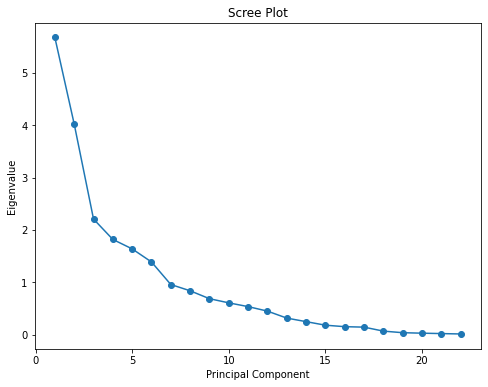

In [14]:
# Create a scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')

plt.show()

Scree plot（屏幕图）是一种用于帮助确定主成分分析（PCA）中要保留的主成分数量的图形工具。PCA 是一种降维技术，它可以将高维数据转换为低维表示，同时保留尽可能多的原始数据的信息。Scree plot 可以帮助你识别在降维过程中哪些主成分包含了最多的信息。

Scree plot 显示了每个主成分的特征值（eigenvalue）相对于主成分的排序。特征值代表了每个主成分所解释的数据方差的量，因此特征值较大的主成分包含了更多的数据信息。Scree plot 通常以主成分的排序（从第一个主成分到最后一个主成分）为横坐标，特征值为纵坐标。

Scree plot 的主要目的是帮助你识别一个点，这个点后面的主成分的特征值开始急剧下降，而前面的主成分的特征值相对较大。这个点通常称为 "肘部点"（elbow point）。肘部点是一个重要的参考，因为它表示在保留的主成分数量达到一定点时，继续保留更多主成分不再显著提高数据的解释能力。因此，通常会选择保留肘部点之前的主成分数量。

在这个 Scree plot 中，前两个主成分的特征值明显大于后面的主成分，并且特征值之后的下降幅度减小，第二个主成分就可以认为是elbow point。但是前两个变量所占的比例只有44.09%。

[0.25806004 0.18288982 0.10033403 0.08261414 0.07440472 0.06303944
 0.04345041 0.03800731 0.03113545 0.02752094 0.02425672 0.02034842
 0.01428701 0.011204   0.00811522 0.00683244 0.00642507 0.00297145
 0.00159935 0.00118217 0.00083082 0.00049103]


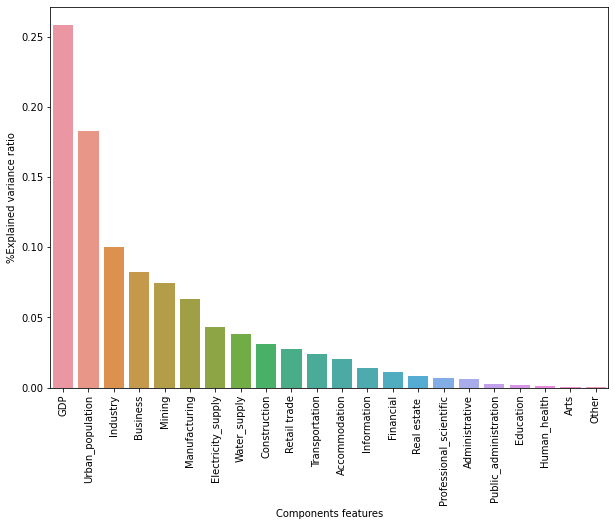

In [15]:
evr=pca.explained_variance_ratio_
print(evr)
features=pay_gap_2021[num_cols].columns

# Plot the EVR using matplotlib pyplot
plt.figure(figsize=(10,7))
sns.barplot(x=np.array(features),y=evr)
plt.xlabel("Components features")
plt.ylabel("%Explained variance ratio")
plt.xticks(rotation=90)
plt.show()

可视化主成分分析（PCA）中各个主成分的解释方差比例（Explained Variance Ratio，EVR）.这个图形是一个条形图，每个条形代表一个主成分，条形的高度表示该主成分解释的方差比例。EVR 图可以帮助你理解每个主成分在数据中所占的比例，通常用于确定要保留多少主成分以达到降维的目标。当你看到 EVR 图时，你可以关注特征值开始迅速下降的点，这些主成分通常包含了最多的信息。

[ 5.67732093  9.70089691 11.9082455  13.72575658 15.36266043 16.74952803
 17.70543699 18.54159775 19.22657768 19.8320384  20.36568631 20.81335149
 21.12766582 21.3741539  21.55268881 21.70300244 21.84435402 21.90972599
 21.94491165 21.97091929 21.98919739 22.        ]


<function matplotlib.pyplot.show(close=None, block=None)>

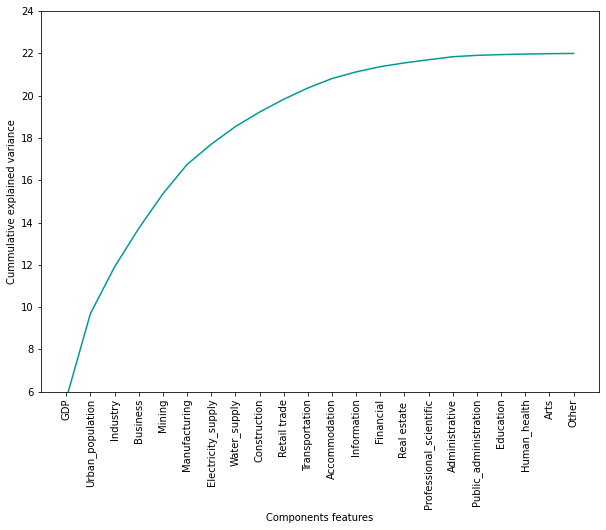

In [16]:
evc = np.cumsum(pca.explained_variance_)
print(evc)

features = pay_gap_2021[num_cols].columns

plt.figure(figsize=(10,7))
sns.lineplot(x=np.array(features), y=evc, color='#009999')
plt.xlabel("Components features")
plt.ylabel("Cummulative explained variance")
plt.ylim(6,24)
plt.xticks(rotation=90)
plt.show

绘制一个图形，用于可视化累积的解释方差（Cumulative Explained Variance）随着主成分数量的增加而变化的情况。这种图形通常称为 PCA 图（Principal Component Analysis Plot）或累积解释方差图。这个 PCA 图显示了随着主成分数量的增加，累积解释方差如何逐渐增加。通常，你可以关注图中曲线开始趋于平稳的点，这表示在那个点之后，增加更多的主成分将不再显著提高数据的解释能力。选择保留的主成分数量通常取决于任务需求和保留多少数据信息的目标。

In [17]:
loadings=pd.DataFrame(pca.components_.T[:,:6],index=np.array(features),columns=names[:6])
loadings

,PC1,PC2,PC3,PC4,PC5,PC6
GDP,0.144506,-0.342941,0.241891,0.183047,-0.112014,-0.163378
Urban_population,0.154390,-0.375446,0.081609,-0.102380,-0.036701,0.206728
Industry,-0.305494,-0.172530,-0.147590,0.182491,0.129454,0.049599
Business,-0.348191,-0.167212,-0.026280,0.058360,0.050195,0.025788
Mining,-0.211500,-0.028913,0.306721,0.204304,-0.415900,0.137660
Manufacturing,-0.313598,0.196520,-0.127273,-0.185583,-0.025311,0.041927
Electricity_supply,-0.099010,-0.321157,-0.269082,0.090689,0.175628,0.064328
Water_supply,-0.082693,-0.230865,-0.353531,-0.333296,-0.184644,0.120972
Construction,-0.195739,-0.349258,-0.070792,0.091050,0.014634,0.164091
Retail trade,-0.307751,0.050968,0.127976,0.177096,-0.243414,-0.195580


As most values are quite small and we cannot really see which variables determine which factors, we will further rotate the axis to visualize the relationship between variables and factors more clearly.

Axis Rotation: Varimax Orthogonal

In [18]:
features=pay_gap_2021[num_cols].columns
X= pay_gap_2021[features]
# Normalizing features
X_norm= (X-X.mean(axis=0))/X.std(axis=0)
# Fit factor analyzer with principal components and varimax rotation
fa=FactorAnalyzer(rotation="varimax",n_factors=6,method='principal')
fa.fit(X_norm)
# Get the rotated factor pattern
loadings2= pd.DataFrame(fa.loadings_,index=X_norm.columns,columns=[f"Factor{i+1}" for i in range(6)])
rotated_factor_pattern=loadings2[abs(loadings2)>=0.4].dropna(how='all')
# Display the results
rotated_factor_pattern

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
GDP,-0.502641,NaN,NaN,NaN,-0.616858,NaN
Urban_population,-0.630608,NaN,NaN,NaN,NaN,NaN
Industry,NaN,0.699268,NaN,NaN,NaN,NaN
Business,NaN,0.583081,NaN,NaN,NaN,NaN
Mining,NaN,NaN,0.833200,NaN,NaN,NaN
Manufacturing,0.675007,NaN,NaN,NaN,0.568468,NaN
Electricity_supply,NaN,0.828761,NaN,NaN,NaN,NaN
Water_supply,NaN,0.578545,NaN,0.624657,NaN,NaN
Construction,NaN,0.779916,NaN,NaN,NaN,NaN
Retail trade,0.627668,NaN,0.433814,NaN,NaN,0.409284


Factor 1 is determined by GDP per capita, Urban population(%), Manufacturing, Retail trade, Information and Financial pay gaps (Urban & Service Pay Gap)
Factor 2 is determined by pay gaps in Industry, Business, Electricity Supply, Construction, and Real Estate (Industry & Business Pay Gap)
Factor 3 is determined by pay gaps in Mining and Accommodation (Resource Extraction Pay Gap)
Factor 4 is determined by pay gaps Water Supply, Public Administration and other (Public Service Pay Gap)
Factor 5 is determined by GDP per capita(euros) and pay gaps in Education, Human Health and Arts (Economic Development Pay Gap)
Factor 6 is determined by pay gaps in Scientific Administrative areas (Science & Administration Pay Gap)

Clustering
Hierarchical method ward

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

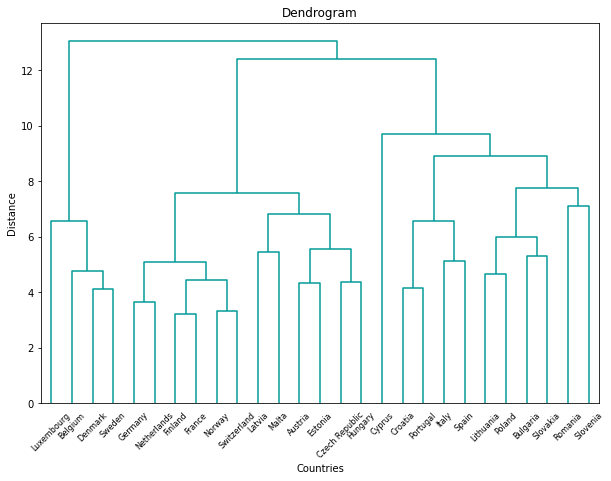

In [20]:
# extract factor scores for each country
factor_scores = fa.transform(X_norm)
# perform Ward hierarchical clustering
Z = linkage(X_norm, method='ward')

# plot dendrogram to visualize hierarchical clustering
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=pay_gap_2021['Country'].values, orientation='top', leaf_font_size=8,
           color_threshold=0, above_threshold_color='#009999')
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Distance')
plt.show()

Ward hierarchical clustering（Ward 层次聚类）是一种层次聚类算法，用于将数据集中的数据点分组成层次结构的聚类。这种方法的目标是在每个步骤中最小化组内方差的增加。Ward 层次聚类是一种自底向上的聚类方法，从每个数据点开始，逐渐合并相邻的数据点或聚类，直到形成一个大的聚类或整个数据集。

以下是 Ward 层次聚类的关键特点和步骤：

初始化步骤：首先，将每个数据点视为一个单独的聚类。这些初始聚类包含了所有的数据点。

合并聚类：在每个合并步骤中，算法选择合并两个聚类，以最小化它们合并后的组内方差的增加。具体来说，它计算每对聚类之间的距离，然后选择距离最小的两个聚类进行合并。

构建层次结构：合并步骤会逐渐构建一个层次结构，其中每个节点代表一个聚类。树的叶子节点对应于最初的数据点，而根节点对应于包含所有数据点的大聚类。

确定聚类数量：可以通过截取树的层次结构来确定最终的聚类数量。截取树意味着选择树的某个水平（或距离阈值），将树切成子树，每个子树对应一个聚类。

/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

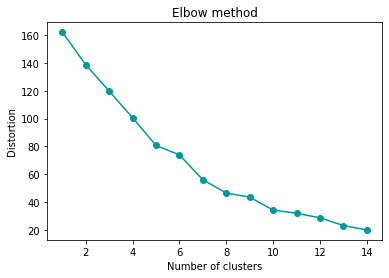

In [21]:
# Determine optimal number of clusters using elbow method
distortions=[]
for i in range(1,15):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(factor_scores)
    distortions.append(kmeans.inertia_)
plt.plot(range(1,15),distortions,marker='o', color='#009999')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

通过“肘部法则”（Elbow Method）来确定K均值聚类中的最佳聚类数量
畸变程度inertia_是K均值模型的一个指标，表示各个数据点到它们所属簇的距离的平方和。通常，畸变程度越小，簇内的数据点越接近其簇中心。
“肘部法则”通过观察图中的拐点（"elbow"）来确定最佳的聚类数量。拐点通常表示畸变程度迅速减小的趋势减缓，这是一个合适的聚类数量。
The visual representations suggest that choosing **8 clusters** would be appropriate.

K-means

In [22]:
# Perform k-means clustering with optimal number of clusters
kmeans = KMeans(n_clusters=8,random_state=42).fit(factor_scores)
# Add cluster labels to the factor scores dataframe
factor_scores_df=pd.DataFrame(factor_scores,index=X_norm.index,columns=[f"Factor{i+1}" for i in range(6)])
factor_scores_df['Cluster']=kmeans.labels_
# Merge cluster labels with pay_gap_2021 dataframe
pay_gap_2021_clustered=pd.merge(pay_gap_2021,factor_scores_df['Cluster'],left_index=True,right_index=True)
# Display the clustered dataframe
pay_gap_2021_clustered[['Country','Cluster']]

/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Country,Cluster
11,Austria,2
23,Belgium,5
35,Bulgaria,6
47,Croatia,1
59,Cyprus,4
71,Czech Republic,2
83,Denmark,5
95,Estonia,2
107,Finland,5
119,France,5


In [23]:
# Perform k-means clustering with optimal number of clusters
kmeans=KMeans(n_clusters=8,random_state=42).fit(factor_scores)
# Add cluster labels to the factor scores dataframe
factor_scores_df=pd.DataFrame(factor_scores,index=X_norm.index,columns=['Urban&Service', 'Industry&Business', 'Mining&Accommodation', 'Public Service', 'Economic Development', 'Science&Administration'])
factor_scores_df['Cluster']=kmeans.labels_
# Calculate mean values for each factor by cluster
mean_values=factor_scores_df.groupby('Cluster').mean()
# Display the mean values
print(mean_values)


         Urban&Service  Industry&Business  Mining&Accommodation  \
Cluster                                                           
0             0.643056           0.123426              0.647612   
1            -0.567816          -0.296515             -0.991615   
2             0.768817           1.092177              0.047875   
3             0.875951          -1.635213             -0.779856   
4            -0.747380          -2.105415              3.129958   
5            -0.989932           0.358844              0.128330   
6             0.621686          -0.548492             -0.265560   
7            -0.654351          -1.244431              0.271274   

         Public Service  Economic Development  Science&Administration  
Cluster                                                                
0              1.509811             -0.090063                0.114739  
1              0.396471              1.224927                0.423039  
2             -0.691707              0.07

/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


1. For urbanisation degree and pay gaps in Service, clusters 3 and 5 have the biggest values.
2. For pay gaps in Industry and Business, clusters 4 and 3 have the greatest values.
3. For pay gaps in Mining and Accomodation, cluster 4 has the greatest values.
4. For pay gaps in Public Service, cluster 1 has the greatest values.
5. For GDP per capita and pay gaps in Education, cluster 7 has the biggest values.
6. For pay gaps in Scientific and Administrative Areas, cluster 6 has the biggest values.
! Note that I used the absolute values for these interpretations.

In [24]:

selected_columns = pay_gap_2021_clustered[['Country', 'Cluster']]

selected_columns.to_csv('cluster_countries.csv', index=False)


Cluster 0 (Latvia, Lithuania, Malta, Neitherlands) has the lowest degree of urbanisation and greatest pay gaps in Manufacturing, but low or moderate values in other areas, comparing to the other clusters.
Cluster 1 (Croatia, Hungary, Italy, Portugal, Spain) has low or moderate values for all the studied factors.
Cluster 2 (Austria, Czech Republic, Estonia, Germany, Slovakia, Switzerland) has low or moderate values for all the studied factors.
Cluster 3 (Poland, Slovenia) has the biggest pay gaps in Industry and Business and Water supply and Administration.
Cluster 4 (Cyprus) has the lowest pay gaps in Industry and Business and biggest pay gaps in Mining and Accomodation.
Also, we can observe that most of the countries and their neighbors are colored in the same color, suggesting a possible existence of spatial dependency.?
Cluster 5 (Belgium, Denmark, Finland, France, Norway, Sweden) has the greatest degree of urbanisation and lowest pay gaps in Manufacturing, but low or moderate values in other areas, comparing to the other clusters.
Cluster 6 (Bulgaria and Romania) has the greatest pay gaps in Scientific and Administrative Areas.
Cluster 7 (Luxembourg) has the biggest GDP per capita and lowest pay gaps in Education.

Sptial analysis
As the countries on the map are colored according to their assigned cluster, we can find that many neighboring countries share the same color, there could be spatial dependency present in the data.

In [25]:
!pip install pysal
!pip install folium
from sklearn.feature_selection import mutual_info_regression
from scipy.cluster.hierarchy import dendrogram, linkage
import folium
from folium.plugins import Search
import libpysal
from libpysal  import weights
from libpysal.weights import Queen
import libpysal as lps
import geopandas as gpd
import spreg
from spreg import OLS
from spreg import MoranRes
from spreg import ML_Lag
from spreg import ML_Error
import esda
from esda.moran import Moran, Moran_Local
import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster, plot_local_autocorrelation
from splot.libpysal import plot_spatial_weights
from giddy.directional import Rose

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 KB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 59.8 MB/s eta 0:00:00:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 KB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 KB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 KB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 68.3 MB/s eta 0:00:00:00:010:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.8/331.8 KB 38.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 74.0 MB/s eta 0:00:00:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 MB 13.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 58.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 KB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 KB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 KB 43.5 MB/s eta 0:00:00
  Created wheel for inequality: filename=inequality-1.0.0-py3-none-any.whl size=11799 sha256=f534e216bcf355fab53b9c5b5a636730ea0e1221115c73390df4dbb81127851f
  Stored in directory: /home/ubuntu/.cache/pip/wheels/52/f7/af/eb988b28568f650a2329b2b3e954019a1c3ceb084dae385b51
  Created wheel for mgwr: filename=mgwr-2.1.2-py3-none-any.whl size=46384 sha256=b2d52929bda2011580279f09a34b79936c3d3b7d47e1fb24adef9abd34ad93df
  Stored in directory: /home/ubuntu/.cache/pip/wheels/4d/43/6e/bd2d0

In [26]:
# Import other dataset and source
gii = pd.read_csv("Gender_Inequality_Index.csv")
json_df = gpd.read_file('worldcountries_geojson.geojson')
json_df.rename(columns={'ADMIN': 'Country'}, inplace=True)
# merge cluster labels with pay_gap_2021 dataframe
pay_gap_2021_clustered = pd.merge(pay_gap_2021, factor_scores_df, left_index=True, right_index=True)
database = pd.merge(json_df, pay_gap_2021_clustered, on='Country')
database1 = pd.merge(database, gii[['Country','GII']], on='Country')
print(database1.columns)
# Export the database1
# Select specific columns
selected_columns = database1[['GII', 'Urban&Service', 'Industry&Business', 'Mining&Accommodation', 'Public Service', 'Economic Development', 'Science&Administration', 'Cluster']]

# export specific columns
selected_columns.to_csv('database1.csv', index=False)

Index(['Country', 'ISO_A3', 'geometry', 'GDP', 'Urban_population', 'Industry',
       'Business', 'Mining', 'Manufacturing', 'Electricity_supply',
       'Water_supply', 'Construction', 'Retail trade', 'Transportation',
       'Accommodation', 'Information', 'Financial', 'Real estate ',
       'Professional_scientific', 'Administrative', 'Public_administration',
       'Education', 'Human_health', 'Arts', 'Other', 'Urban&Service',
       'Industry&Business', 'Mining&Accommodation', 'Public Service',
       'Economic Development', 'Science&Administration', 'Cluster', 'GII'],
      dtype='object')


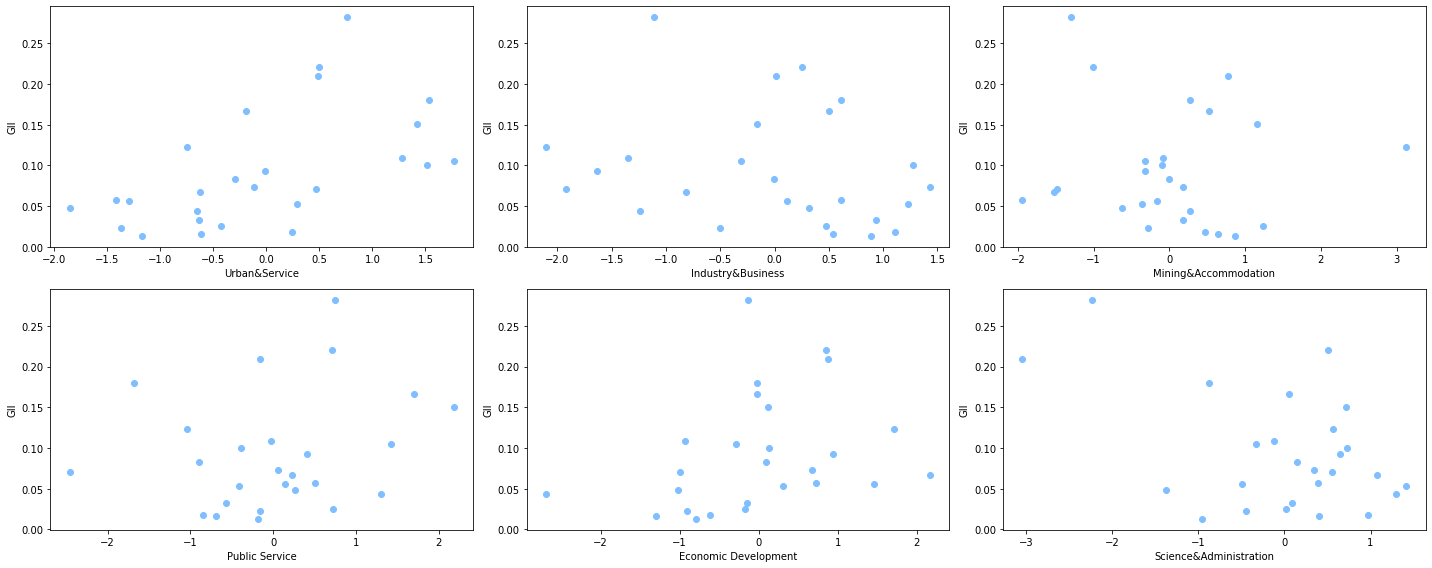

In [27]:
y = database1['GII']
database_ = database1[['Urban&Service','Industry&Business','Mining&Accommodation','Public Service','Economic Development','Science&Administration']]
num_cols = [col for col in database_.columns if database_[col].dtype in ['int64','float64']]

num_cols_len = len(num_cols)
num_cols_per_row = 3

num_rows = int(num_cols_len / num_cols_per_row) + (num_cols_len % num_cols_per_row > 0)
fig, axs = plt.subplots(num_rows, num_cols_per_row, figsize=(20, 4*num_rows), gridspec_kw={'width_ratios': [1, 1, 1]})

for idx, col in enumerate(num_cols):
    row_idx = int(idx / num_cols_per_row)
    col_idx = idx % num_cols_per_row
    if idx >= num_cols_len:
        axs[row_idx, col_idx].axis('off')
    else:
        axs[row_idx, col_idx].scatter(database_[col], y, color="#80bfff")
        axs[row_idx, col_idx].set_xlabel(col)
        axs[row_idx, col_idx].set_ylabel('GII')

# Remove any empty subplots
if num_cols_len % num_cols_per_row > 0:
    for i in range(num_cols_len % num_cols_per_row, num_cols_per_row):
        fig.delaxes(axs[num_rows-1, i])

plt.tight_layout()
plt.show()

We can observe some linear positive relation between Urban & Service factor and GII and Economic Development and GII.
Additionally, although the remaining variables do not show a clear linear correlation with the target variable, the graph depicting the pay gap factor for Industry & Business exhibits an interesting sinusoidal pattern.

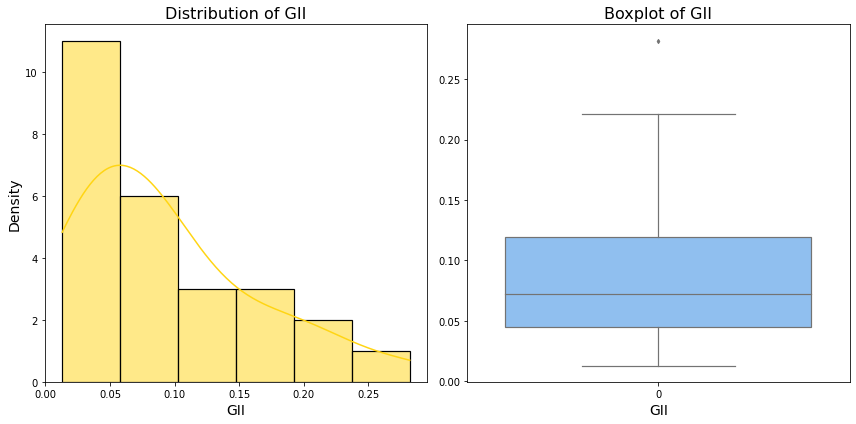

In [28]:
def target_var_visualized():
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    sns.histplot(data=database1['GII'], kde=True, color = "#ffd514", edgecolor='black', linewidth=1.2)
    plt.xlabel('GII', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.title('Distribution of GII', fontsize=16)
    plt.subplot(122)
    sns.boxplot(data=database1['GII'], color = "#80bfff", linewidth=1.2, fliersize=3)
    plt.xlabel('GII', fontsize=14)
    plt.title('Boxplot of GII', fontsize=16)
    plt.tight_layout()
    plt.show()

target_var_visualized()

In [29]:
max_gii_index = database1['GII'].idxmax()
max_gii_country = database1.loc[max_gii_index, 'Country']
print(f"The country with the highest GII is {max_gii_country} with a GII of {database1['GII'].max()}.")

The country with the highest GII is Romania with a GII of 0.282.


It is encouraging to see that the majority of countries have a relatively low Gender Inequality Index, indicating progress towards equal treatment regardless of gender. This is a positive sign that the world is moving towards greater gender equality.
Unfortunately, an outlier is present in our analysis, indicating a country that falls short of achieving gender equality. This country is Romania, which could benefit from implementing more policies to address gender disparities.

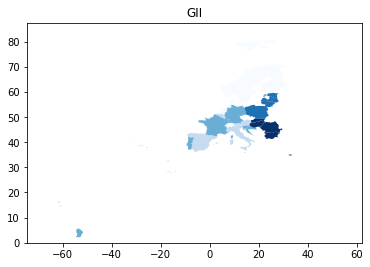

In [30]:
cluster_variable = database1[['GII']]

# Create the plot
f, ax = plt.subplots(figsize=(6, 6))

# Plot the map
database1.plot(
    column=cluster_variable.iloc[:, 0], # access the column of interest by its name
    ax=ax,
    scheme="Quantiles",
    linewidth=0,
    cmap="Blues",
)

# Set the axis title to the name of variable being plotted
ax.set_title(cluster_variable.columns[0])
ax.set_ylim(bottom=0)

# Display the figure
plt.show()

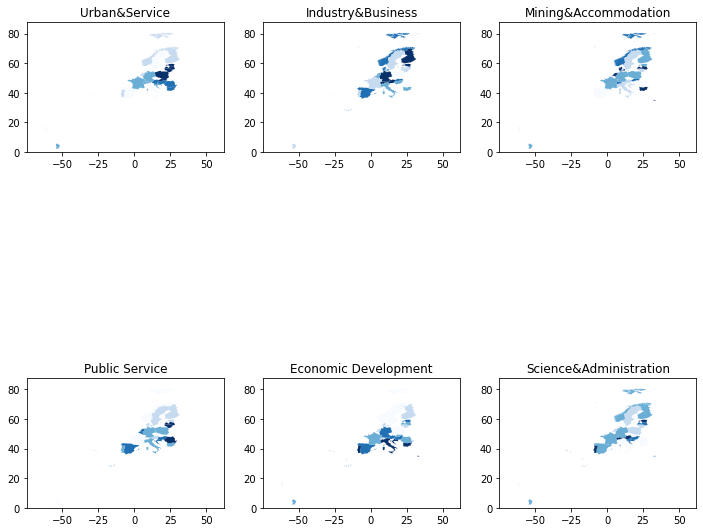

In [31]:
cluster_variables = database1[['Urban&Service','Industry&Business','Mining&Accommodation','Public Service','Economic Development','Science&Administration']]

# Calculate the number of rows and columns needed for the plot
num_vars = len(cluster_variables)
num_cols_per_row = 3
num_rows = 2

# Create the plot
f, axs = plt.subplots(nrows=num_rows, ncols=num_cols_per_row, figsize=(12, 12))

# Make the axes accessible with single indexing
axs = axs.flatten()

# Start a loop over all the variables of interest
for i, col in enumerate(cluster_variables):
    # select the axis where the map will go
    ax = axs[i]
    # Plot the map
    database1.plot(
        column=col,
        ax=ax,
        scheme="Quantiles",
        linewidth=0,
        cmap="Blues",
    )
    # Set the axis title to the name of variable being plotted
    ax.set_title(col)
    ax.set_ylim(bottom=0)

    # Check if this is the last plot, and remove the remaining empty plots if it is
    if i == num_vars - 1:
        num_cols_len = num_cols_per_row * num_rows
        if num_vars % num_cols_per_row > 0:
            for j in range(num_vars % num_cols_per_row, num_cols_per_row):
                f.delaxes(axs[num_rows-1, j])

# Display the figure
plt.show()

Several visual patterns jump out from the maps, revealing differences across the spatial distributions of the individual variables. Several variables tend to increase in value from the east to the west/ south to north (pay gaps in Science & Administration, Industry & Business), while others have a spatial trend in the opposite direction [ GII(higher), GDP(lower) ].

Spatial Regression

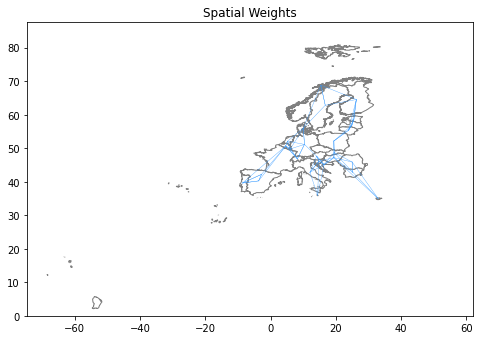

In [32]:
from scipy.sparse import coo_matrix
#Spatial weights matrix
W = weights.KNN.from_dataframe(database1, k=3)
W.transform = 'r'

def plot_spatial_weights1(W, gdf):
    # Get the spatial weights matrix as a dataframe
    w_sparse = W.sparse
    w_df = coo_matrix(w_sparse).tocoo()
    w_df = pd.DataFrame({'row': w_df.row, 'col': w_df.col, 'weight': w_df.data})
    w_df = w_df.merge(gdf.reset_index(), left_on='row', right_on='index').rename(columns={'geometry': 'from_geometry'})
    w_df = w_df.merge(gdf.reset_index(), left_on='col', right_on='index', suffixes=('_from', '_to')).rename(columns={'geometry': 'to_geometry'})

    # Plot the spatial weights
    fig, ax = plt.subplots(figsize=(8, 8))
    gdf.plot(ax=ax, facecolor='white', edgecolor='grey')
    for idx, row in w_df.iterrows():
        plt.plot([row['from_geometry'].centroid.x, row['to_geometry'].centroid.x],
                 [row['from_geometry'].centroid.y, row['to_geometry'].centroid.y],
                 color='#3399ff', linewidth=row['weight'])
    ax.set_title('Spatial Weights')
    ax.set_ylim(bottom=0)
    plt.show()

plot_spatial_weights1(W, database1)

可视化空间权重矩阵（Spatial Weights Matrix），以帮助理解数据中的空间关联性。通过这种可视化，你可以观察到哪些区域之间存在强烈的空间联系（线段较粗），哪些区域之间联系较弱（线段较细），以及这些联系的地理分布情况。这有助于理解数据中的空间模式和相互关系。

OLS Regression Analysis and Diagnostics

In [33]:
ols = OLS(y=database1['GII'].values, x=database1[['Urban&Service','Industry&Business','Mining&Accommodation','Public Service','Economic Development','Science&Administration']].values, w=W, name_y='GII', name_x=['Urban&Service','Industry&Business','Mining&Accommodation','Public Service','Economic Development','Science&Administration'], name_w='distance', name_ds='database', white_test=True, spat_diag=True, moran=True)
print(ols.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :    database
Weights matrix      :    distance
Dependent Variable  :         GII                Number of Observations:          26
Mean dependent var  :      0.0931                Number of Variables   :           7
S.D. dependent var  :      0.0707                Degrees of Freedom    :          19
R-squared           :      0.6958
Adjusted R-squared  :      0.5997
Sum squared residual:   0.0380219                F-statistic           :      7.2424
Sigma-square        :       0.002                Prob(F-statistic)     :   0.0003909
S.E. of regression  :       0.045                Log likelihood        :      47.968
Sigma-square ML     :       0.001                Akaike info criterion :     -81.935
S.E of regression ML:      0.0382                Schwarz criterion     :     -73.128

------------------------------------------------------------

主要目的是执行空间自回归（Spatial Autoregressive）分析，使用 OLS（普通最小二乘法）来估计因变量（'GII'，即 Gender Inequality Index）与一组自变量（'Urban&Service'、'Industry&Business'、'Mining&Accommodation'、'Public Service'、'Economic Development'、'Science&Administration'）之间的关系，同时考虑了空间权重矩阵（W）和空间自相关性。
总之，这段代码执行了一个空间自回归的 OLS 分析，用于研究 'GII' 与一组自变量之间的关系，并考虑了地理空间自相关性。通过分析 OLS 模型的摘要统计信息，你可以了解模型中自变量的影响以及模型是否合适。此外，设置了异方差性检验和空间诊断，以进一步评估模型的性能和假设的满足程度。
Multicollinearity Condition Number: This is a measure of the extent of multicollinearity (high correlation) among the independent variables. The condition number ranges from 1 (no multicollinearity) to infinity (perfect multicollinearity). A value above 30 may indicate a problem with multicollinearity.
Test on Normality of Errors: This tests whether the residuals are normally distributed. A small p-value (usually less than 0.05) suggests that the residuals are not normally distributed.
Diagnostics for Heteroskedasticity: This section tests for heteroskedasticity, which is the presence of unequal variances in the errors across observations. The Breusch-Pagan test and the Koenker-Bassett test are tests for heteroskedasticity in the error term. A small p-value (less than 0.05) suggests that there is heteroskedasticity. In this case, both tests suggest that there is no significant evidence of heteroskedasticity.
Specification Robust Test: The White test is a specification test that tests whether the model is correctly specified. A small p-value suggests that the model is not correctly specified.
Diagnostics for Spatial Dependence: This section tests for spatial dependence, which is the dependence of observations on their geographic location. The Moran’s I test is a test for spatial autocorrelation in the residuals, while the Lagrange Multiplier test is a test for spatial lag and spatial error models. A small p-value suggests that there is spatial dependence.
Overall, the diagnostic analysis conducted on the model suggests that it is reliable. However, there is a possibility of spatial dependence if we use a threshold value of alpha=0.16, which indicates that further examination of the dataset is necessary. It may be beneficial to consider a Lag model to account for any potential spatial autocorrelation in the residuals.

Lag Model

In [34]:
# Lag model
y = database1['GII'].values
x=database1[['Urban&Service','Industry&Business','Mining&Accommodation','Public Service','Economic Development','Science&Administration']].values
lag = spreg.ML_Lag(y, x, w=W, name_y='GII', name_x=['Urban&Service','Industry&Business','Mining&Accommodation','Public Service','Economic Development','Science&Administration'])
print(lag.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :         GII                Number of Observations:          26
Mean dependent var  :      0.0931                Number of Variables   :           8
S.D. dependent var  :      0.0707                Degrees of Freedom    :          18
Pseudo R-squared    :      0.7366
Spatial Pseudo R-squared:  0.6919
Log likelihood      :     49.4347
Sigma-square ML     :      0.0013                Akaike info criterion :     -82.869
S.E of regression   :      0.0356                Schwarz criterion     :     -72.805

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
---------------------------------------------------------------

这段代码的含义是执行一个拉格（Lag）模型，用于分析因变量 'GII' 与一组自变量 'Urban&Service'、'Industry&Business'、'Mining&Accommodation'、'Public Service'、'Economic Development'、'Science&Administration' 之间的关系，同时考虑了空间滞后效应。并通过拉格模型来考虑地理空间上的相互影响。通过分析拉格模型的摘要统计信息，你可以了解模型中自变量的影响以及模型是否合适。这对于研究空间依赖性和解释地理数据的变化非常有用。

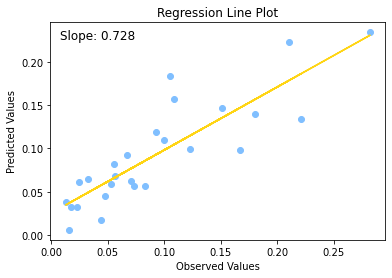

In [35]:
# Get the predicted values
y_pred = lag.predy
y_pred = y_pred.flatten()

# Create a scatter plot of the observed vs predicted values
plt.scatter(y, y_pred, color='#80bfff')

# Adding the trend line
z = np.polyfit(y, y_pred, 1)
p = np.poly1d(z)
plt.plot(y, p(y), color='#ffd514')

# Add slope to the plot
slope = round(z[0], 3)
plt.text(0.03, 0.97, f"Slope: {slope}", transform=plt.gca().transAxes, fontsize=12,
             verticalalignment='top')

# Set the labels and title
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Regression Line Plot')

# Show the plot
plt.show()


The analysis indicates that the intercept, Urban & Service, Public Service, and Science & Admin are statistically significant at the 5% level of significance and GDP & Education at the 10% level of significance. The coefficients of these variables are positive for the intercept, Urban & Service, and Public Service, which means that they have a positive effect on the GII. In contrast, Science & Admin has a negative coefficient, meaning that it has a negative effect on the GII.
On the other hand, Industry & Business, Resource Extraction are not statistically significant at the 5% level. Therefore, we cannot conclude that these variables have a significant effect on the GII.
The spatial lag variable, W_GII, is also statistically significant at the 5% level, with a positive coefficient of 0.3603959. This result indicates that there is spatial dependence in the data, and including the spatial lag variable in the model helps to account for this dependence.
The Pseudo R-squared of 0.7366 and Spatial Pseudo R-squared of 0.6919 suggest that the model explains a high percentage of the variation in the GII and accounts for a substantial amount of the spatial dependence in the data.
Countries with greater urbanization, higher GDP per capita, and lower pay gaps tend to have lower Gender Inequality Index scores. It’s important to note that GDP and urbanization have a negative impact on the index.

Error model

In [36]:
# Error model
y = database1['GII'].values
x=database1[['Urban&Service','Industry&Business','Mining&Accommodation','Public Service','Economic Development','Science&Administration']].values
err = spreg.ML_Error(y, x, w=W, name_y='GII', name_x=['Urban&Service','Industry&Business','Mining&Accommodation','Public Service','Economic Development','Science&Administration'])
print(err.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ML SPATIAL ERROR (METHOD = full)
---------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :         GII                Number of Observations:          26
Mean dependent var  :      0.0931                Number of Variables   :           7
S.D. dependent var  :      0.0707                Degrees of Freedom    :          19
Pseudo R-squared    :      0.4683
Log likelihood      :     49.8610
Sigma-square ML     :      0.0010                Akaike info criterion :     -85.722
S.E of regression   :      0.0323                Schwarz criterion     :     -76.915

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT         0.10619    

/home/ubuntu/.local/lib/python3.10/site-packages/scipy/optimize/_minimize.py:863: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  Courier Corporation, 2013.


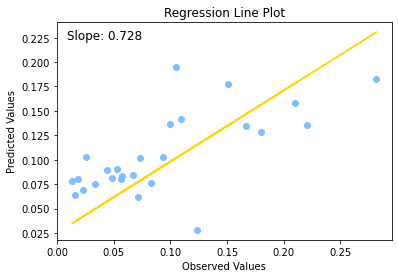

In [37]:

# Get the predicted values
y_pred1 = err.predy
y_pred1= y_pred1.flatten()


# Create a scatter plot of the observed vs predicted values
plt.scatter(y, y_pred1, color='#80bfff')

# Adding the trend line
z1 = np.polyfit(y, y_pred1, 1)
p1 = np.poly1d(z)
plt.plot(y, p1(y), color='#ffd514')

# Add slope to the plot
slope1 = round(z[0], 3)
plt.text(0.03, 0.97, f"Slope: {slope1}", transform=plt.gca().transAxes, fontsize=12,
             verticalalignment='top')

# Set the labels and title
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Regression Line Plot')

# Show the plot
plt.show()

The spatial lag model has a higher pseudo R-squared value of 0.7366, which suggests that this model explains more of the variation in the dependent variable. However, the spatial pseudo R-squared of the lag model is 0.6919, indicating that there may be some spatial dependency in the errors.
On the other hand, the spatial error model has a lower pseudo R-squared of 0.4683, which suggests that it explains less of the variation in the dependent variable. However, the model includes a spatial autocorrelation term (lambda) with a significant coefficient of 0.7630358, which indicates the presence of spatial dependency in the errors.
